# 1-Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree
from matplotlib import pyplot as plt
df = pd.read_csv("indiancrop_dataset.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


In [3]:
df.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [4]:
df['CROP'].value_counts()

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: CROP, dtype: int64

In [5]:
df.count()

N_SOIL         2200
P_SOIL         2200
K_SOIL         2200
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
STATE          2200
CROP_PRICE     2200
CROP           2200
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

N_SOIL           int64
P_SOIL           int64
K_SOIL           int64
TEMPERATURE    float64
HUMIDITY       float64
ph             float64
RAINFALL       float64
STATE           object
CROP_PRICE       int64
CROP            object
dtype: object

<ipython-input-8-9bf8ca4b1157>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

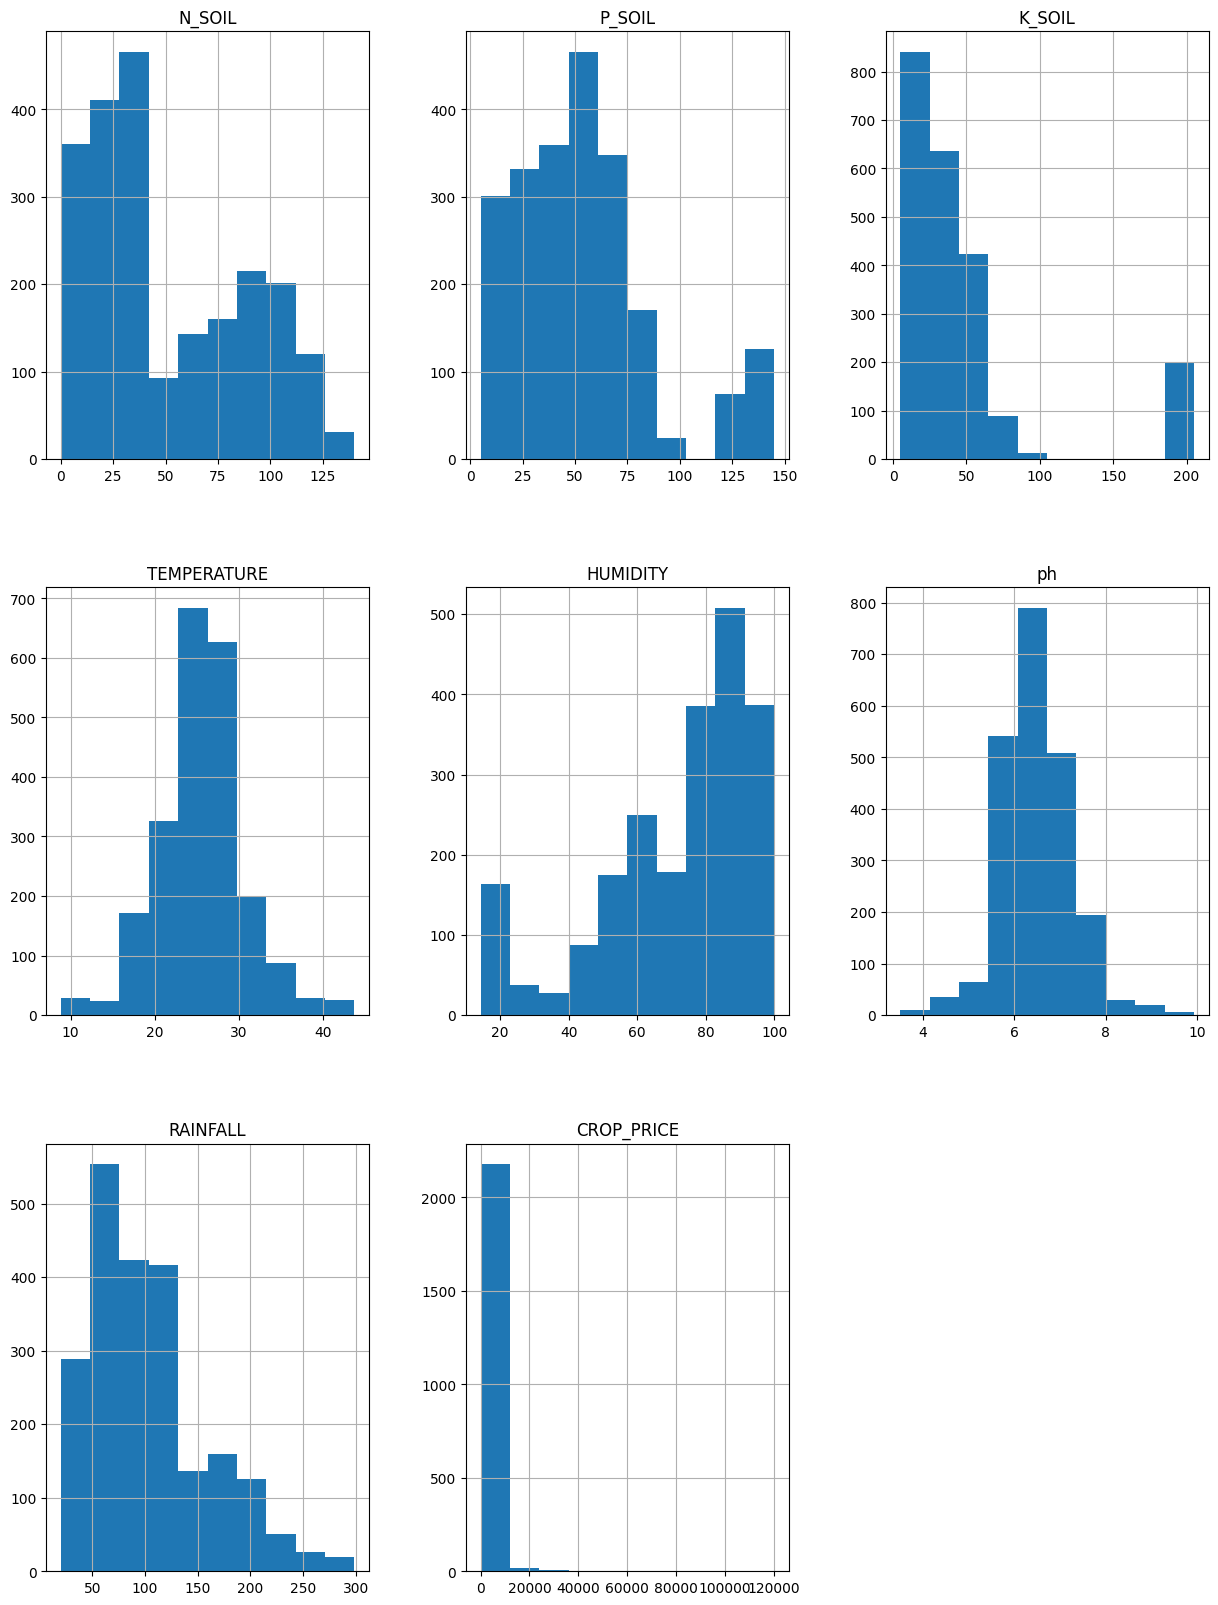

In [8]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
df.hist(ax=ax)
plt.show

<ipython-input-9-cd224141434d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(ax = ax, kind='density', subplots=True, layout=(4,4), sharex=False)


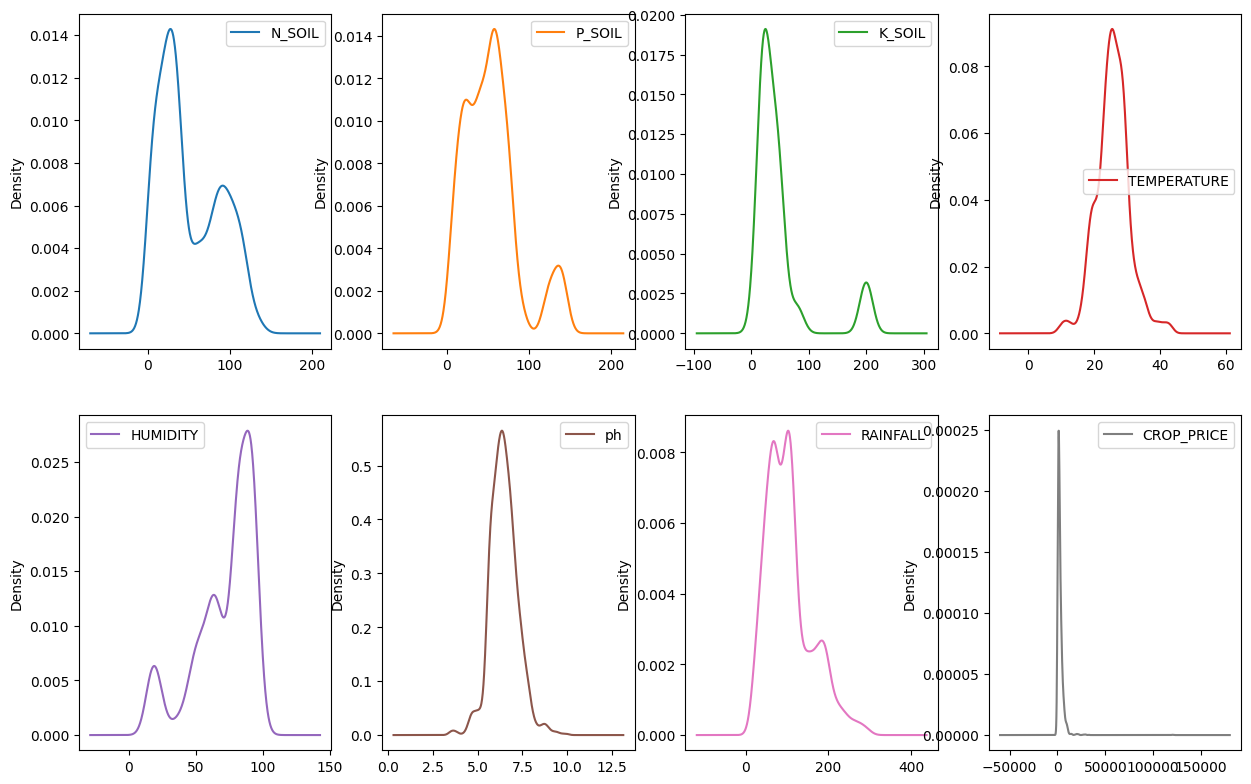

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.plot(ax = ax, kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

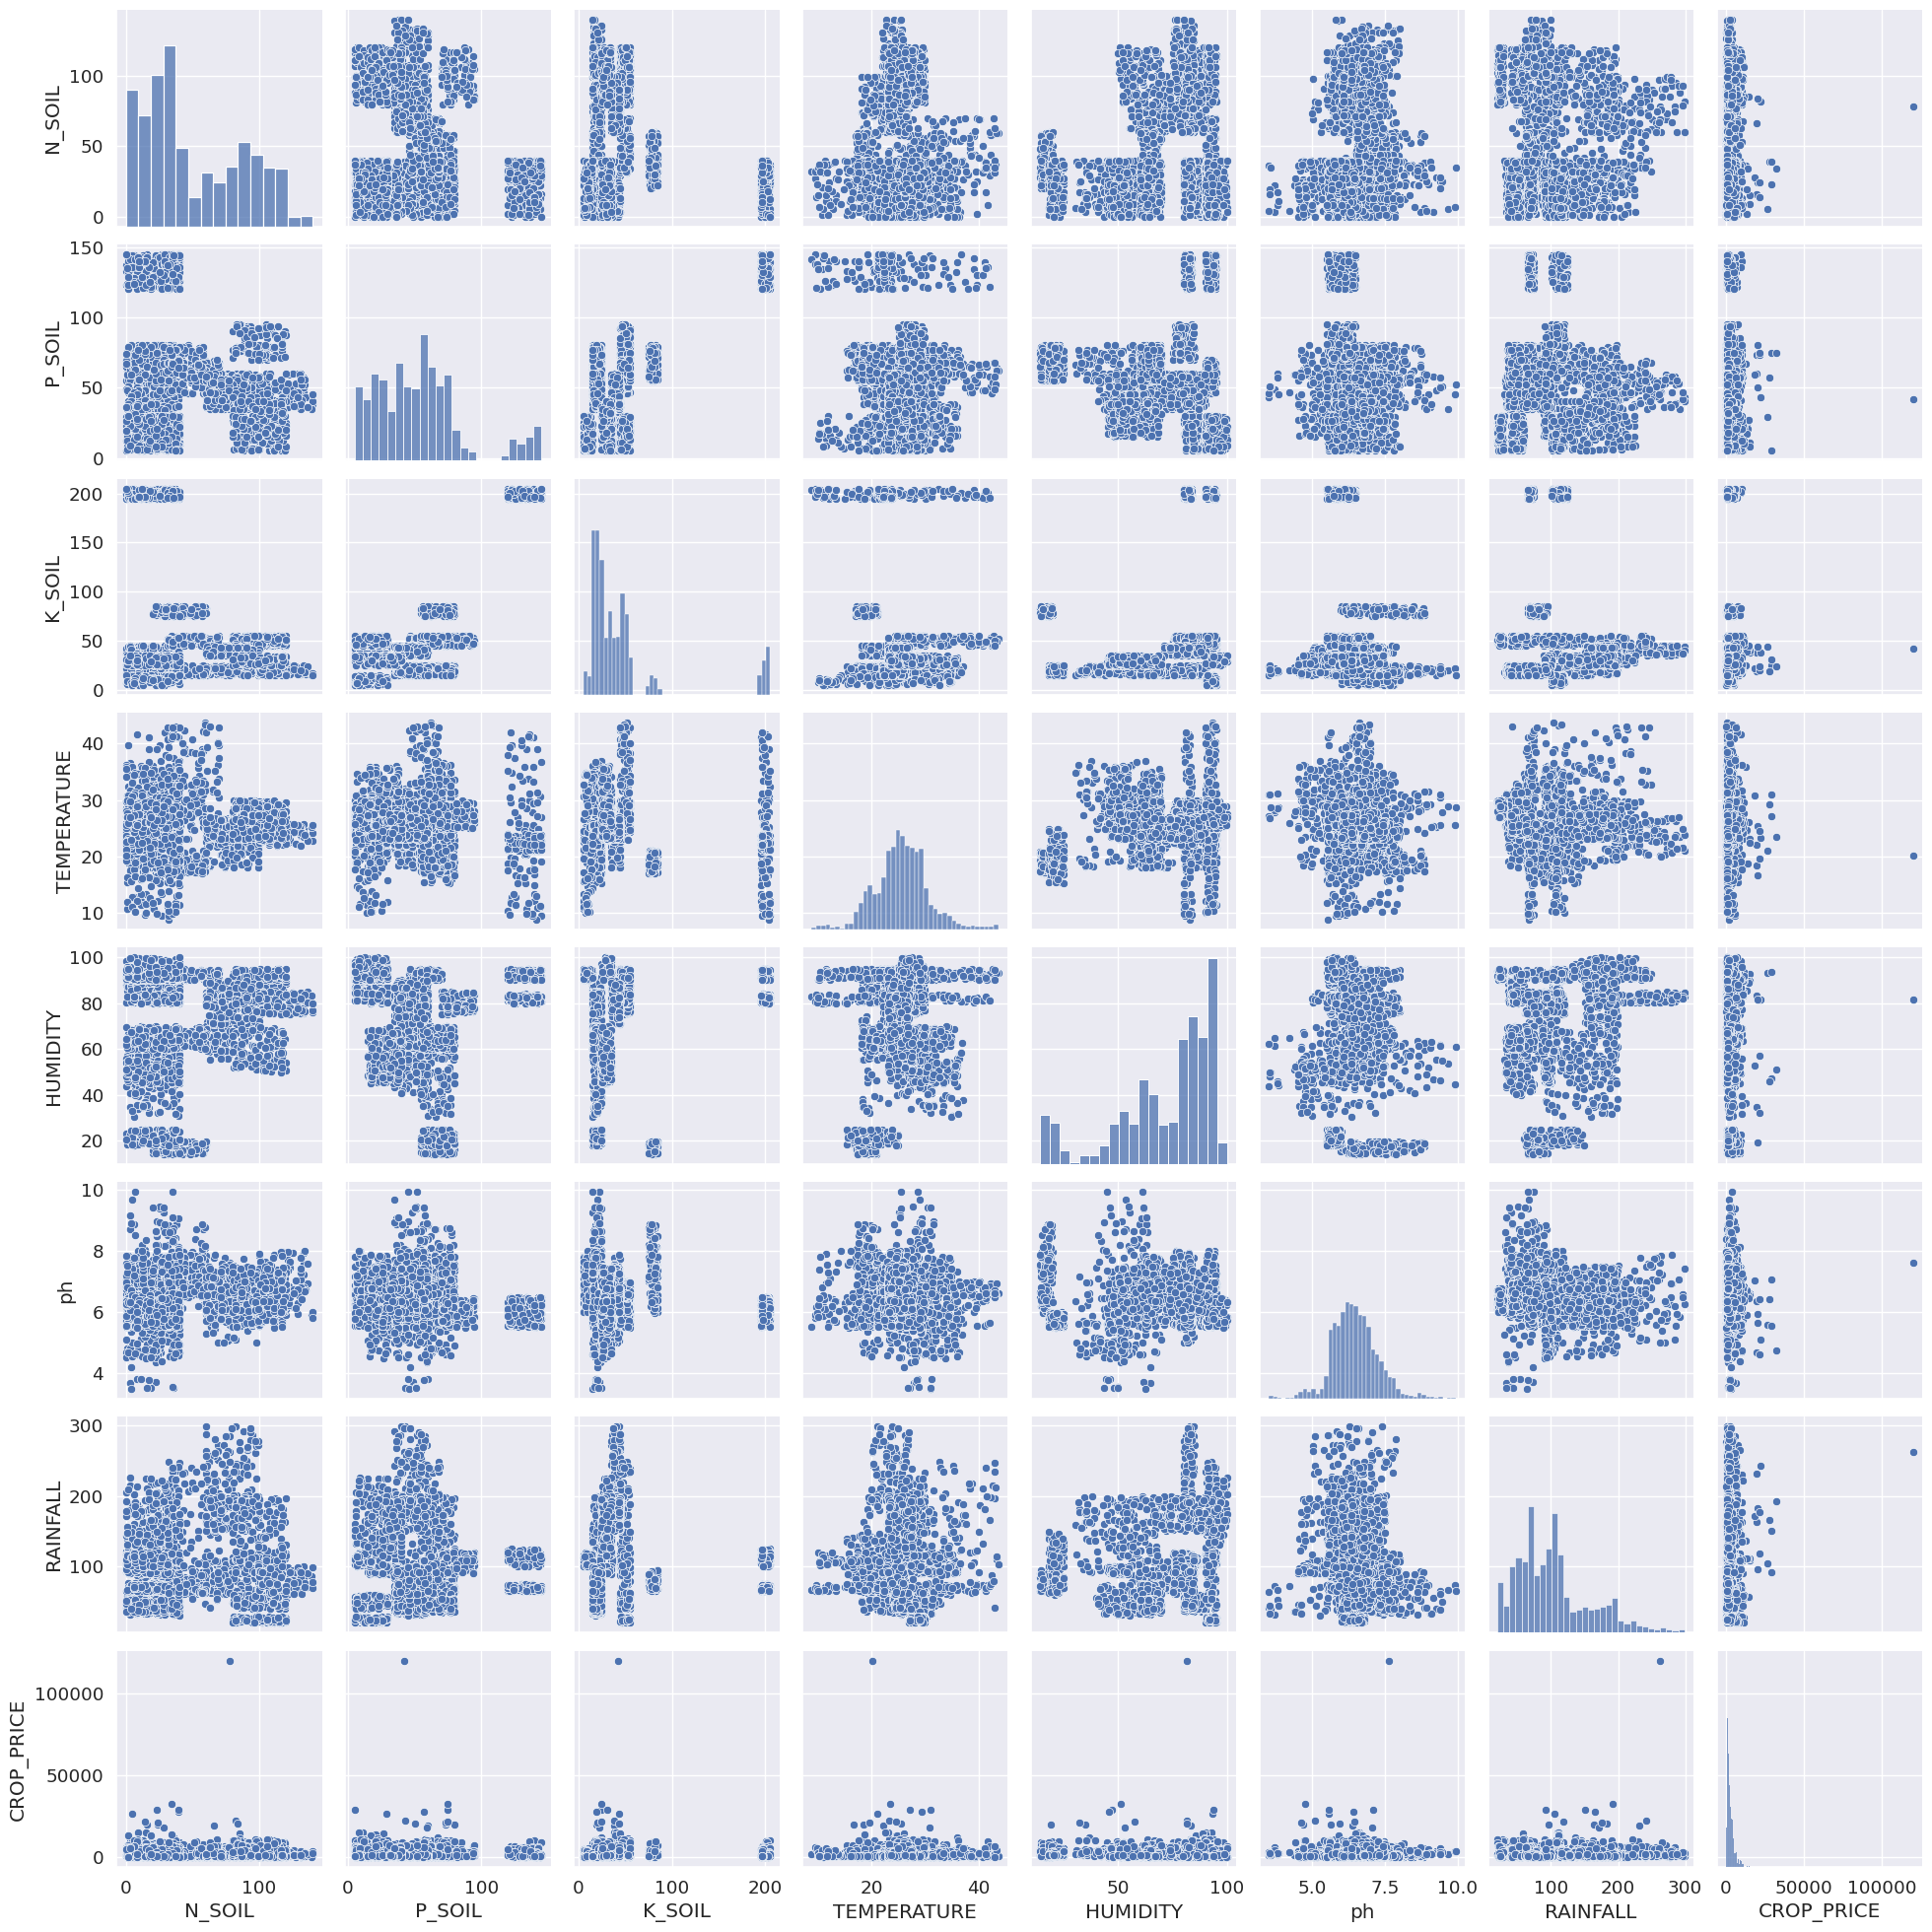

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(font_scale=1.2)
sns.pairplot(df)

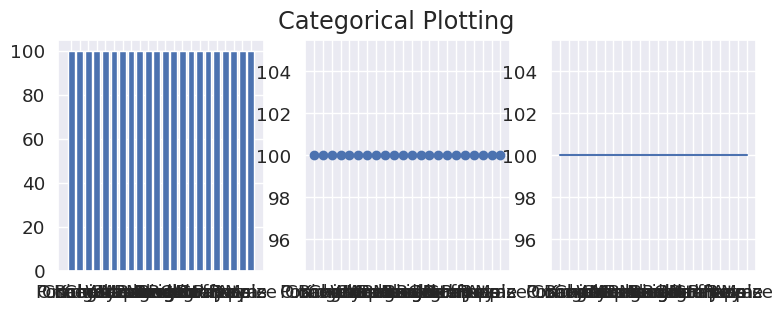

In [11]:
names =list(set(df['CROP'].values))
values =list(df['CROP'].value_counts())

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

<Axes: >

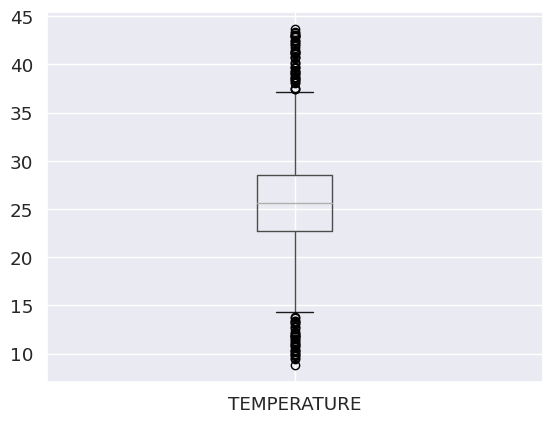

In [12]:
df.boxplot(['TEMPERATURE'])

<Axes: >

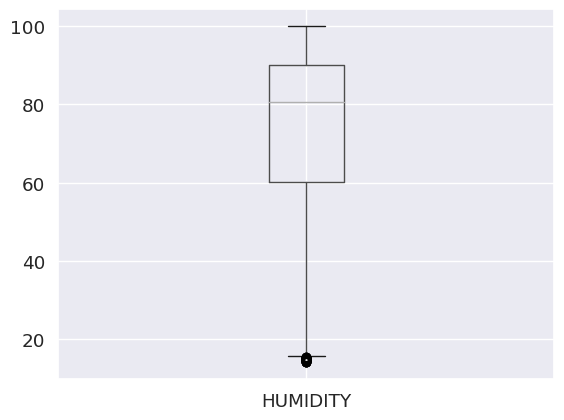

In [13]:
df.boxplot(['HUMIDITY'])

<Axes: >

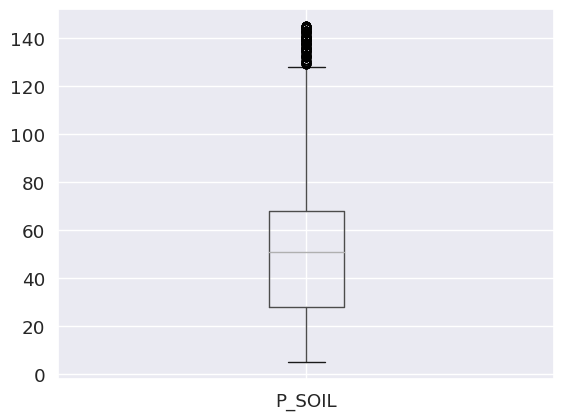

In [14]:
df.boxplot(['P_SOIL'])

<Axes: >

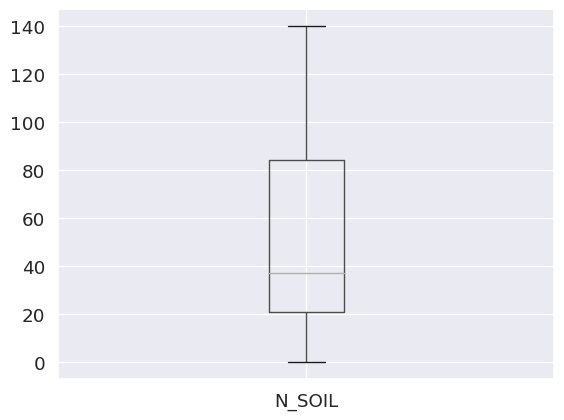

In [15]:
df.boxplot(['N_SOIL'])

<Axes: >

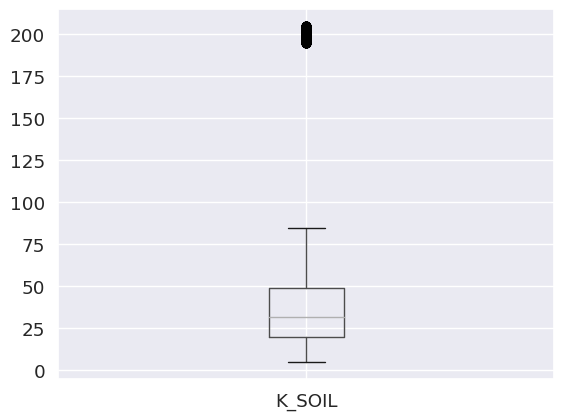

In [16]:
df.boxplot(['K_SOIL'])

<Axes: >

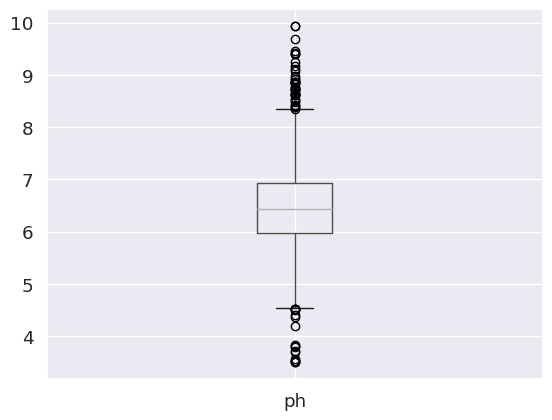

In [17]:
df.boxplot(['ph'])

<Axes: >

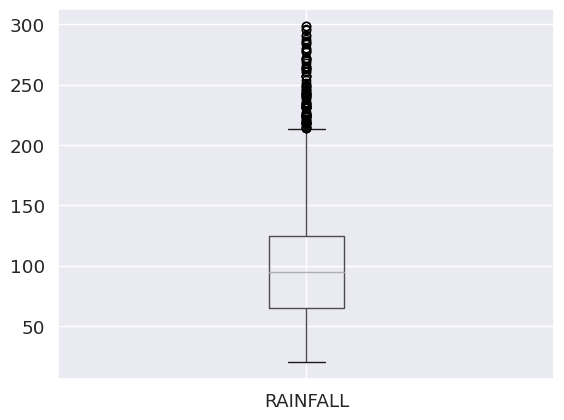

In [18]:
df.boxplot('RAINFALL')

<Axes: >

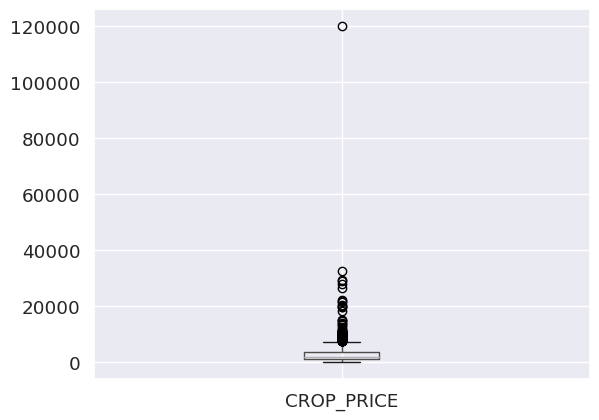

In [19]:
df.boxplot('CROP_PRICE')

#2- Data Integration

No multiple datasets or databases to integrate

#3- Data Reduction 

In [20]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


<ipython-input-21-539249d0061e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidth = 0.9, cmap = 'coolwarm')


<Axes: >

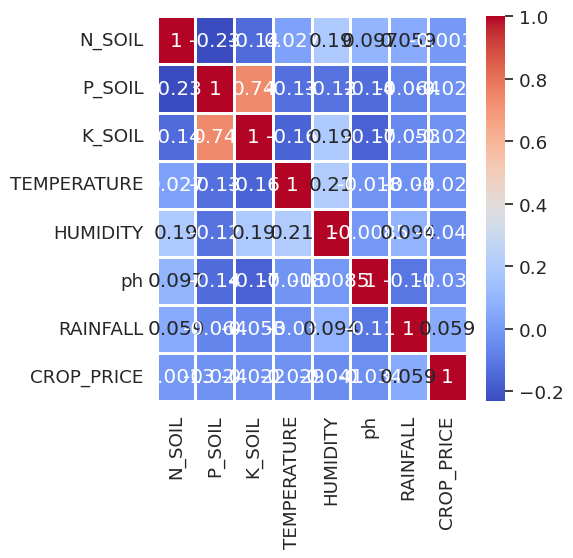

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, linewidth = 0.9, cmap = 'coolwarm')

In [22]:
df = df.drop(['STATE','CROP_PRICE'],axis = 1)

In [23]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.drop('CROP', axis=1)
selector = SelectKBest(chi2, k = 6)
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
X_new = selector.fit_transform(X, le.fit_transform(df['CROP']))
X_new

array([[ 90.        ,  42.        ,  43.        ,  20.87974371,
         82.00274423, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        ,  21.77046169,
         80.31964408, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        ,  23.00445915,
         82.3207629 , 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        ,  24.13179691,
         67.22512329, 173.3228386 ],
       [117.        ,  32.        ,  34.        ,  26.2724184 ,
         52.12739421, 127.1752928 ],
       [104.        ,  18.        ,  30.        ,  23.60301571,
         60.39647474, 140.9370415 ]])

In [24]:
df = df.drop("ph",axis = 1)

#4- Data transformation 

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['N_SOIL', 'P_SOIL','K_SOIL','TEMPERATURE','HUMIDITY','RAINFALL']] = scaler.fit_transform(df[['N_SOIL', 'P_SOIL','K_SOIL','TEMPERATURE','HUMIDITY','RAINFALL']])
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,RAINFALL,CROP
0,0.642857,0.264286,0.190,0.345886,0.790267,0.656458,Rice
1,0.607143,0.378571,0.180,0.371445,0.770633,0.741675,Rice
2,0.428571,0.357143,0.195,0.406854,0.793977,0.875710,Rice
3,0.528571,0.214286,0.175,0.506901,0.768751,0.799905,Rice
4,0.557143,0.264286,0.185,0.324378,0.785626,0.871231,Rice
...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.566064,Coffee
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.386972,Coffee
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.550071,Coffee
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.384280,Coffee


#Model Building

In [26]:
x = dict(df['CROP'].value_counts())

In [27]:
# categorical encoding
df_tran = df_test = pd.DataFrame()
for i in x.keys():
  shuffle = df[df.CROP==i].sample(frac = 1)
  df_tran = df_tran.append(shuffle[0:60])
  df_test = df_test.append(shuffle[60:100])
le = preprocessing.LabelEncoder()
df_tran['CROP'] = le.fit_transform(df_tran['CROP'])
df_test['CROP'] = le.fit_transform(df_test['CROP'])

<ipython-input-27-28da7573e0a2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tran = df_tran.append(shuffle[0:60])
<ipython-input-27-28da7573e0a2>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(shuffle[60:100])
<ipython-input-27-28da7573e0a2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tran = df_tran.append(shuffle[0:60])
<ipython-input-27-28da7573e0a2>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(shuffle[60:100])
<ipython-input-27-28da7573e0a2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

In [28]:
# Train and Test splitting
x_train = df_tran.drop('CROP',axis=1)
y_train = df_tran['CROP']
x_test = df_test.drop('CROP',axis=1) 
y_test = df_test['CROP']

##Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 60, criterion='entropy', max_depth=12,max_features="sqrt",min_samples_split=3)
clf.fit(x_train, y_train)
#rf_probs = clf.predict_proba(X_test)[:, 1]
clf.score(x_train,y_train)


1.0

In [30]:
clf.score(x_test,y_test)

0.9875

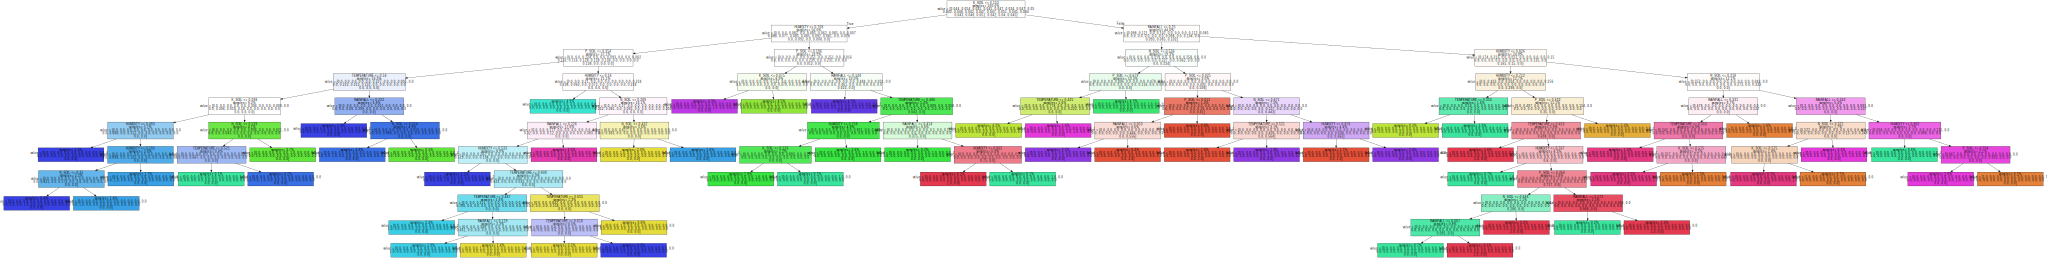

In [31]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(1):
     tree = clf.estimators_[i]
     dot_data = export_graphviz(tree,
                                feature_names=x_train.columns,  
                                filled=True,  
                                max_depth=12, 
                                impurity=False, 
                                proportion=True)
     graph = graphviz.Source(dot_data)
     display(graph)

##K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier(n_neighbors=7, p=2)
# weights = uniform (default)
# algorithm = auto (default)
# p=2, uses euclidean distance (results in higher accuracy), p=1 uses manahttan distance 
# n_neighbors 7=13, 3=13, A smaller k value might lead to overfitting, whereas a larger k value may result in oversimplification
KNeighbors.fit(x_train, y_train)
#knn_probs = KNeighbors.predict_proba(X_test)[:, 1]

KNeighborsClassifier(n_neighbors=7)

In [33]:
KNeighbors.score(x_train,y_train)

0.9803030303030303

In [34]:
KNeighbors.score(x_test, y_test)

0.9727272727272728

# Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = [{'C': [0.1,0.2,0.3,1,2,3,4, 10],
    'gamma': [0.1,0.2,0.3,0.4,0.5,1,2],
    'kernel': ['rbf']},
     {'C': [0.1,0.2,0.3,1,2,3,4, 10],
    'gamma': [0.1,0.2,0.3,0.4,0.5, 1,2],
    'kernel': ['poly'],
    'degree':[1,2,3,4]}]

svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,scoring='accuracy' ,cv=5)
geid_seacH=grid_search.fit(x_train, y_train)

In [36]:
pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score'	,'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.905303,0.008299
1,"{'C': 0.1, 'gamma': 0.2, 'kernel': 'rbf'}",0.906061,0.009702
2,"{'C': 0.1, 'gamma': 0.3, 'kernel': 'rbf'}",0.907576,0.010332
3,"{'C': 0.1, 'gamma': 0.4, 'kernel': 'rbf'}",0.909848,0.011589
4,"{'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}",0.911364,0.010873
...,...,...,...
275,"{'C': 10, 'degree': 4, 'gamma': 0.3, 'kernel':...",0.865152,0.007423
276,"{'C': 10, 'degree': 4, 'gamma': 0.4, 'kernel':...",0.935606,0.006776
277,"{'C': 10, 'degree': 4, 'gamma': 0.5, 'kernel':...",0.965152,0.007345
278,"{'C': 10, 'degree': 4, 'gamma': 1, 'kernel': '...",0.983333,0.008159


In [37]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'degree': 3, 'gamma': 2, 'kernel': 'poly'}
Best Score: 0.9886363636363636


In [40]:
final_svc = SVC(C=10,degree=3,kernel= 'poly',gamma= 2 )
final_svc.fit(x_train, y_train)
y_pred = final_svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9772727272727273


##Decision Tree

In [42]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [43]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
dt.score(x_train,y_train)

1.0

In [45]:
dt.score(x_test,y_test)

0.9761363636363637

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

def get_grid_search():
    
    #cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    params = {
        "criterion": ['gini', 'entropy'],
        "max_depth": list(np.arange(1,11)), 
        "min_samples_leaf": list(np.arange(2, 10)),
        "min_samples_split": list(np.arange(2,10))
             }

    #scoring_fnc = make_scorer(r2_score(y_train, y_train_pred))

    grid = GridSearchCV(clf, params, scoring='accuracy')

    grid.fit(x_train, y_train)

    print(grid.best_estimator_)
get_grid_search()




RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=60)


In [47]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=5)

In [48]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=5)

In [49]:
dt.score(x_train,y_train)

0.9931818181818182

In [50]:
dt.score(x_test,y_test)

0.9636363636363636

##Neural Network 

In [51]:
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical 

In [52]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(400, activation='relu', input_dim=6))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(22, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               2800      
                                                                 
 dense_1 (Dense)             (None, 300)               120300    
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 dense_3 (Dense)             (None, 22)                4422      
                                                                 
Total params: 187,722
Trainable params: 187,722
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(x_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
132/132 [==============================] - 1s 3ms/step - loss: 1.9359 - accuracy: 0.4106
Epoch 2/30
132/132 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.7667
Epoch 3/30
132/132 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8455
Epoch 4/30
132/132 [==============================] - 0s 3ms/step - loss: 0.2970 - accuracy: 0.8955
Epoch 5/30
132/132 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9136
Epoch 6/30
132/132 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.9371
Epoch 7/30
132/132 [==============================] - 0s 3ms/step - loss: 0.1361 - accuracy: 0.9538
Epoch 8/30
132/132 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9470
Epoch 9/30
132/132 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.9598
Epoch 10/30
132/132 [==============================] - 0s 3ms/step - loss: 0.1028 - accuracy: 0.9621

In [55]:
score = model.evaluate(x_train, y_train)
score[1]

42/42 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9833


0.9833333492279053

In [56]:
score = model.evaluate(x_test, y_test)
score[1]

28/28 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9818


0.9818181991577148

# Ensemble
<img src='https://github.com/AbdoYAsser88/Project_Crop_prediction/blob/main/Ensemble.png?raw=true' width=600 alt='My Image'>

In [58]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [59]:
# Splittting dataset into features and target variable
X = df.drop('CROP', axis=1)
y = df['CROP']


In [60]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
# Define individual machine learning models

rf_model = clf


dt_model = dt


kn_model = KNeighbors


svm_model = svc

In [64]:
# Define ensemble model 1

ensemble_rf_model = VotingClassifier(estimators=[('rf', rf_model)], voting='hard')

In [65]:
# Define ensemble model 2
ensemble_dt_model = VotingClassifier(estimators=[('dt', dt_model)], voting='hard')

In [66]:
# Define ensemble model 3
ensemble_kn_model = VotingClassifier(estimators=[('kn', kn_model)], voting='hard')

In [67]:
# Define ensemble model 4
ensemble_svm_model = VotingClassifier(estimators=[('svm', svm_model)], voting='hard')


In [68]:
# Define ensemble model All
ensemble_models = VotingClassifier(estimators=[('rf', rf_model),('dt', dt_model), ('kn',kn_model), ('svm', svm_model)], voting='hard')

In [69]:
# Fit ensemble model to training data for each ensemble model


ensemble_rf_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     min_samples_split=3,
                                                     n_estimators=60))])

In [70]:
ensemble_dt_model.fit(X_train, y_train)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5))])

In [71]:
ensemble_kn_model.fit(X_train, y_train)


VotingClassifier(estimators=[('kn', KNeighborsClassifier(n_neighbors=7))])

In [72]:
ensemble_svm_model.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC())])

In [73]:
ensemble_models.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     min_samples_split=3,
                                                     n_estimators=60)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5)),
                             ('kn', KNeighborsClassifier(n_neighbors=7)),
                             ('svm', SVC())])

In [74]:
# Make predictions on testing data
y_predrf = ensemble_rf_model.predict(X_test)

In [75]:
y_preddt = ensemble_dt_model.predict(X_test)


In [76]:
y_predkn = ensemble_kn_model.predict(X_test)

In [77]:
y_predsvm = ensemble_svm_model.predict(X_test)


In [78]:
y_pred = ensemble_models.predict(X_test)

In [79]:
# Calculate accuracy score

accuracyrf = accuracy_score(y_test, y_predrf)

accuracydt = accuracy_score(y_test, y_preddt)

accuracykn = accuracy_score(y_test, y_predkn)

accuracysvm = accuracy_score(y_test, y_predsvm)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy for rain forest\n: {accuracyrf}")
print("")
print(f"Accuracy for decision tree \n: {accuracydt}")
print("")

print(f"Accuracy for k neighbors\n: {accuracykn}")
print("")

print(f"Accuracy for SVM\n: {accuracysvm}")
print("")

print(f"Accuracy for all hard models: {accuracy}")

Accuracy for rain forest
: 0.9927272727272727

Accuracy for decision tree 
: 0.9872727272727273

Accuracy for k neighbors
: 0.9672727272727273

Accuracy for SVM
: 0.9672727272727273

Accuracy for all hard models: 0.98


In [85]:
x_train = df_tran.drop('CROP',axis=1)
y_train = df_tran['CROP']
x_test = df_test.drop('CROP',axis=1) 
y_test = df_test['CROP']

In [103]:
'''from itertools import product
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay



# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier
clf2 = KNeighborsClassifier
clf3 = SVC
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("kn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

#clf1.fit(x_train, y_train)
#clf2.fit(X, y)
#clf3.fit(X, y)
#eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2s, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()'''

'from itertools import product\nimport matplotlib.pyplot as plt\nfrom sklearn import datasets\nfrom sklearn.inspection import DecisionBoundaryDisplay\n\n\n\n# Loading some example data\niris = datasets.load_iris()\nX = iris.data[:, [0, 2]]\ny = iris.target\n\n# Training classifiers\nclf1 = DecisionTreeClassifier\nclf2 = KNeighborsClassifier\nclf3 = SVC\neclf = VotingClassifier(\n    estimators=[("dt", clf1), ("kn", clf2), ("svc", clf3)],\n    voting="soft",\n    weights=[2, 1, 2],\n)\n\n#clf1.fit(x_train, y_train)\n#clf2.fit(X, y)\n#clf3.fit(X, y)\n#eclf.fit(X, y)\n\n# Plotting decision regions\nf, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))\nfor idx, clf, tt in zip(\n    product([0, 1], [0, 1]),\n    [clf1, clf2s, clf3, eclf],\n    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],\n):\n    DecisionBoundaryDisplay.from_estimator(\n        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"\n    )\n    axarr[idx[0], idx

In [104]:
'''
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=ensemble_model,
                                                        X=X,
                                                        y=y,
                                                        train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9],
                                                        cv=10,
                                                        scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
'''

"\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(estimator=ensemble_model,\n                                                        X=X,\n                                                        y=y,\n                                                        train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9],\n                                                        cv=10,\n                                                        scoring='accuracy')\n\ntrain_scores_mean = np.mean(train_scores, axis=1)\ntest_scores_mean = np.mean(test_scores, axis=1)\n"

In [82]:
'''plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning curve for hard voting ensemble model')
plt.legend()
plt.show()
'''

NameError: ignored

In [106]:
# Ensemble Model 2 for SOFT VOTING technique

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [107]:
# Defining all individual machine learning models


rf_model = clf


dt_model = dt


kn_model = KNeighbors


svm_model = SVC (probability=True)



In [108]:

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [109]:
# Define ensemble model with soft voting technique 

ensemble_rf_modelsoft = VotingClassifier(estimators=[('rf', rf_model)], voting='soft')

# Define ensemble model 2
ensemble_dt_modelsoft = VotingClassifier(estimators=[('dt', dt_model)], voting='soft')

# Define ensemble model 3
ensemble_kn_modelsoft = VotingClassifier(estimators=[('kn', kn_model)], voting='soft')


# Define ensemble model 4
ensemble_svm_modelsoft = VotingClassifier(estimators=[('svm', svm_model)], voting='soft')

ensemble_models_soft = VotingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model), ('kn', kn_model), ('svm', svm_model)],
    voting='soft'
)


In [110]:
ensemble_rf_modelsoft.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     min_samples_split=3,
                                                     n_estimators=60))],
                 voting='soft')

In [111]:
ensemble_dt_modelsoft.fit(X_train, y_train)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5))],
                 voting='soft')

In [112]:
ensemble_kn_modelsoft.fit(X_train, y_train)

VotingClassifier(estimators=[('kn', KNeighborsClassifier(n_neighbors=7))],
                 voting='soft')

In [113]:
ensemble_svm_modelsoft.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True))], voting='soft')

In [114]:
# Fit ensemble model to training data

ensemble_models_soft.fit(X_train, y_train)



VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     min_samples_split=3,
                                                     n_estimators=60)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5)),
                             ('kn', KNeighborsClassifier(n_neighbors=7)),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [115]:
# Makee predictions on testing data

y_pred_rf_soft = ensemble_rf_modelsoft.predict(X_test)

y_pred_dt_soft = ensemble_dt_modelsoft.predict(X_test)

y_pred_kn_soft = ensemble_kn_modelsoft.predict(X_test)

y_pred_svm_soft = ensemble_svm_modelsoft.predict(X_test)

y_pred_soft = ensemble_models_soft.predict(X_test)

In [116]:

# Calculate accuracy score

accuracyrfsoft = accuracy_score(y_test, y_pred_rf_soft)

accuracydtsoft = accuracy_score(y_test, y_pred_dt_soft)

accuracyknsoft = accuracy_score(y_test, y_pred_kn_soft)

accuracysvmsoft = accuracy_score(y_test, y_pred_svm_soft)



print(f"Accuracy for rain forest\n: {accuracyrfsoft}")
print("")
print(f"Accuracy for decision tree \n: {accuracydtsoft}")
print("")

print(f"Accuracy for k neighbors\n: {accuracyknsoft}")
print("")

print(f"Accuracy for SVM\n: {accuracysvmsoft}")
print("")






accuracyallsoft = accuracy_score(y_test, y_pred_soft)
print(f"Accuracy for all soft models: {accuracyallsoft}")

Accuracy for rain forest
: 0.9473684210526315

Accuracy for decision tree 
: 0.9473684210526315

Accuracy for k neighbors
: 0.9473684210526315

Accuracy for SVM
: 0.9473684210526315

Accuracy for all soft models: 0.9473684210526315


In [117]:
#Hard Voting Vs Soft Voting Final Score
print(f"Accuracy for all hard models: {accuracy}")
print("")
print(f"Accuracy for all soft models: {accuracyallsoft}")

Accuracy for all hard models: 0.98

Accuracy for all soft models: 0.9473684210526315


In [119]:
#visualization of learning curve for the sof tvoting model
'''
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=ensemble_model,
                                                        X=X,
                                                        y=y,
                                                        train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9],
                                                        cv=10,
                                                        scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning curve for soft voting ensemble model')
plt.legend()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(estimator=ensemble_model,\n                                                        X=X,\n                                                        y=y,\n                                                        train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9],\n                                                        cv=10,\n                                                        scoring='accuracy')\n\ntrain_scores_mean = np.mean(train_scores, axis=1)\ntest_scores_mean = np.mean(test_scores, axis=1)\n\nplt.plot(train_sizes, train_scores_mean, label='Training accuracy')\nplt.plot(train_sizes, test_scores_mean, label='Validation accuracy')\nplt.xlabel('Training set size')\nplt.ylabel('Accuracy')\nplt.title('Learning curve for soft voting ensemble model')\nplt.legend()\nplt.show()\n"